In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(42)
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

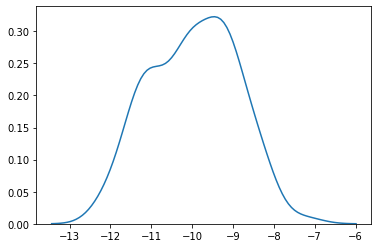

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.056: 100%|██████████| 1500/1500 [00:26<00:00, 57.27it/s]


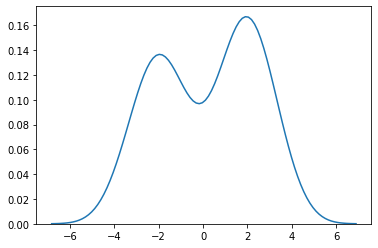

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([-0.01721344, -0.4937898 ,  1.2356285 , -3.1099286 ,
             -2.6575975 ,  0.53843117,  2.706014  , -3.6048033 ,
              1.8777701 ,  1.5650965 ,  2.5166404 ,  1.8846465 ,
              2.3381026 ,  1.4603494 ,  2.120912  ,  1.7478418 ,
             -2.3583486 ,  3.7030575 , -1.6707222 ,  3.3901873 ,
              0.8947223 , -0.01908641, -0.7586895 ,  2.1370895 ,
             -2.2491322 , -0.7530563 ,  1.5864584 ,  1.7961242 ,
              1.3185441 , -1.5935363 , -0.5833101 ,  2.4523256 ,
              1.9259923 ,  1.1430581 , -2.2507024 , -3.743834  ,
              2.6173835 , -1.7793742 ,  1.9863571 , -1.1734382 ,
             -1.6814667 ,  0.6571365 , -1.9854945 ,  3.8113122 ,
              2.9847069 , -2.706543  ,  2.7098324 ,  2.3974307 ,
              2.3079538 , -1.1319    , -0.9534339 ,  2.2867694 ,
             -2.4612753 ,  3.0305233 , -1.1107976 , -2.7796526 ,
              1.6902885 , -1.2755929 ,  3.4402394 , -2.2704618 ,
              2.855209  ,

In [9]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.LinearKernel(), num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3079: 100%|██████████| 1500/1500 [00:10<00:00, 137.26it/s]


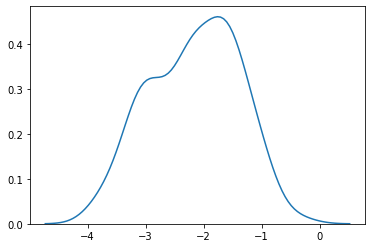

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [11]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RandomFeatureKernel(), num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations * 2)

SVGD 2.0282: 100%|██████████| 3000/3000 [01:50<00:00, 27.09it/s]


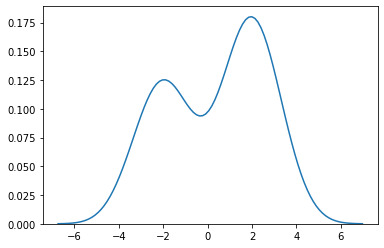

In [12]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [13]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.IMQKernel(), num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0929: 100%|██████████| 1500/1500 [00:15<00:00, 96.33it/s]


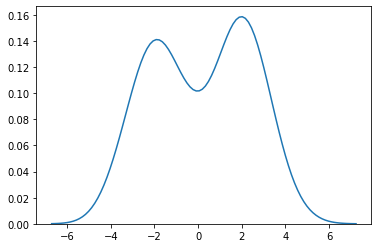

In [14]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [15]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.MixtureKernel([0.5, 0.5], [kernels.LinearKernel(), kernels.RandomFeatureKernel()]),
            num_stein_particles=100)
svgd_state = svgd.init(rng_key)
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.3167: 100%|██████████| 1500/1500 [00:59<00:00, 25.09it/s]


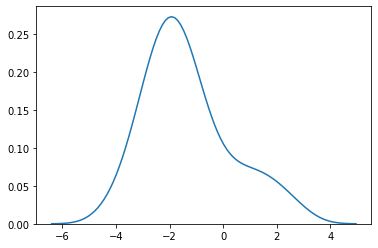

In [16]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])